<a href="https://colab.research.google.com/github/JayanthJakkula/Data-Science/blob/main/matplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib


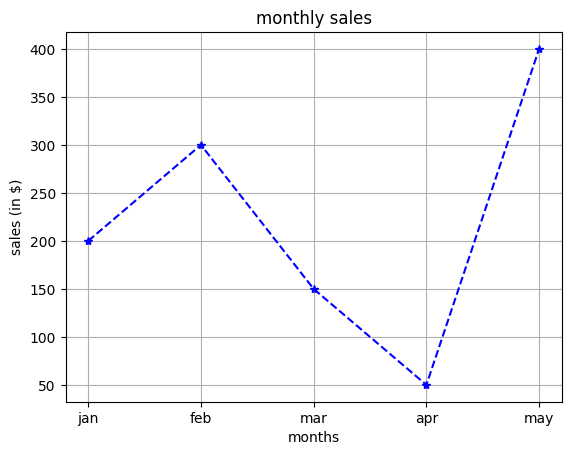

In [ ]:
import matplotlib.pyplot as plt
m=['jan','feb','mar','apr','may']
s=[200,300,150,50,400]
plt.plot(m,s,color='blue',marker='*',linestyle='--')
plt.title('monthly sales')
plt.xlabel('months')
plt.ylabel('sales (in $)')
plt.grid(True)
plt.show()


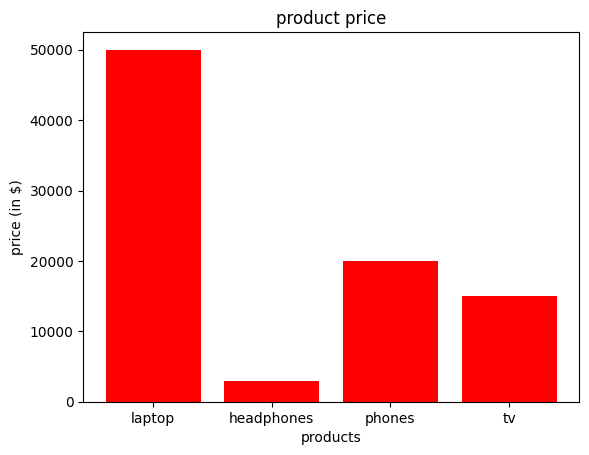

In [ ]:
# bar-chart
products=['laptop','headphones','phones','tv']
price=[50000,3000,20000,15000]
plt.bar(products,price,color='red')
plt.title('product price')
plt.xlabel('products')
plt.ylabel('price (in $)')

plt.show()

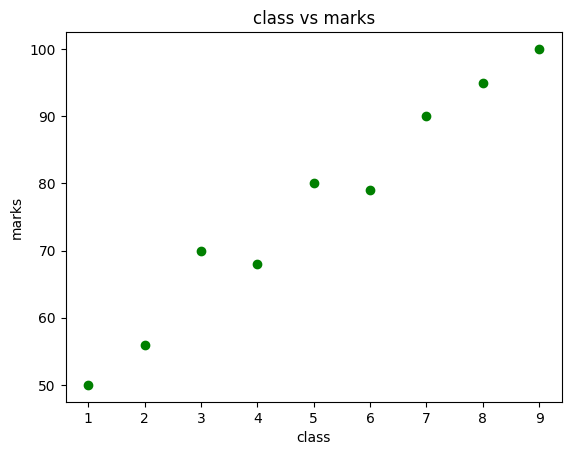

In [ ]:
# scattor plot
import numpy as np

cla=np.array([1,2,3,4,5,6,7,8,9])
marks=np.array([50,56,70,68,80,79,90,95,100])
plt.scatter(cla,marks,color='green')
plt.title('class vs marks')
plt.xlabel('class')
plt.ylabel('marks')
plt.show()

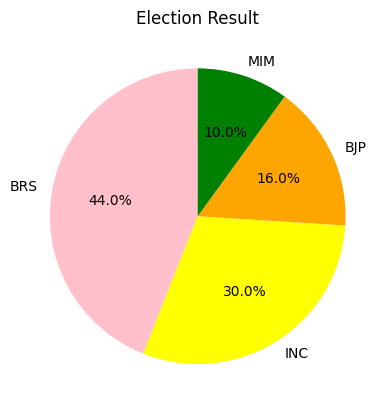

In [ ]:
# pie chart
party=['BRS','INC','BJP','MIM']
voteper=[44,30,16,10]
col=['pink','yellow','orange','green']
plt.pie(voteper,labels=party,colors=col,autopct='%1.1f%%',startangle=90)
plt.title('Election Result')
plt.show()

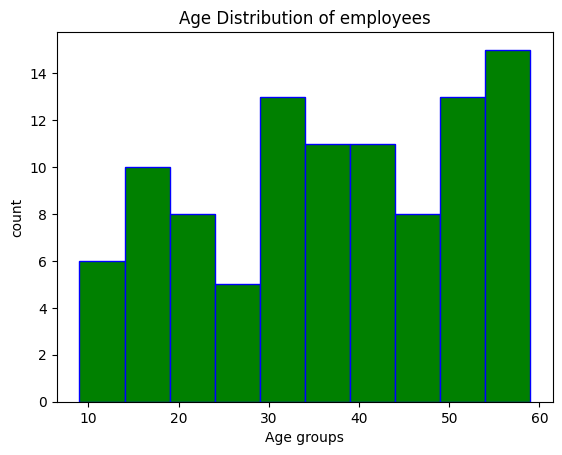

In [ ]:
# histogram
ages=np.random.randint(8,60,100)
plt.hist(ages,bins=10,color='green',edgecolor='blue')
plt.title('Age Distribution of employees')
plt.xlabel('Age groups')
plt.ylabel('count')
plt.show()

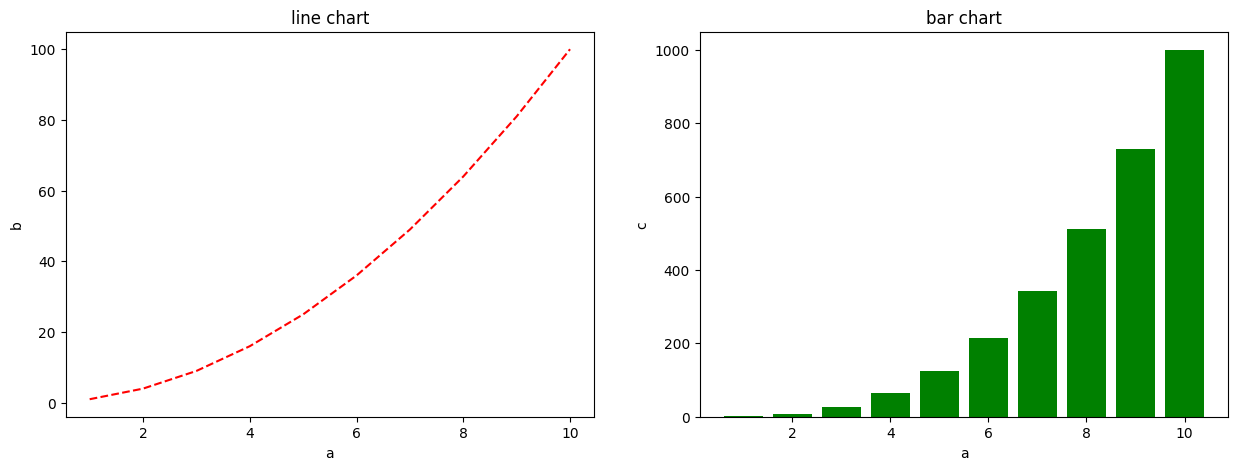

In [ ]:
# subplot
a=[1,2,3,4,5,6,7,8,9,10]
b=[1,4,9,16,25,36,49,64,81,100]
c=[1,8,27,64,125,216,343,512,729,1000]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(a,b,color='red',linestyle='--')
plt.title('line chart')
plt.xlabel('a')
plt.ylabel('b')
plt.subplot(1,2,2)
plt.bar(a,c,color='green')
plt.title('bar chart')
plt.xlabel('a')
plt.ylabel('c')
plt.show()

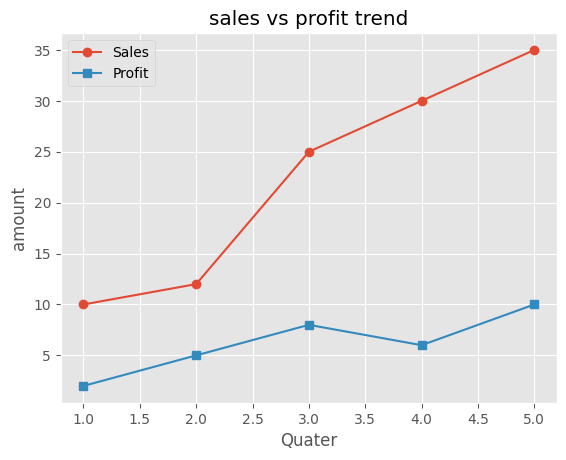

In [ ]:
# legend
plt.style.use('ggplot')
x=[1,2,3,4,5]
sales=[10,12,25,30,35]
profit=[2,5,8,6,10]
plt.plot(x,sales,label='Sales',marker='o')
plt.plot(x,profit,label='Profit',marker='s')
plt.title('sales vs profit trend')
plt.xlabel('Quater')
plt.ylabel('amount')
plt.legend()
plt.savefig('sales_and_profits.png')
plt.show()

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
print(df.head())


print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())


duplicates_before = df.duplicated().sum()
print(f"Duplicate rows before removal: {duplicates_before}")


df = df.drop_duplicates()


duplicates_after = df.duplicated().sum()


print(f"Duplicate rows removed: {duplicates_before - duplicates_after}")
print(f"Dataset shape after removing duplicates: {df.shape}")

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


invalid_dates = df['Date'].isna().sum()
print(f"Rows with invalid or missing dates: {invalid_dates}")


df = df.sort_values(by='Date').reset_index(drop=True)


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)

print("Missing values after imputation:")
print(df[numeric_cols].isnull().sum())






Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Duration        Date  Pulse  Maxpulse  Calories
0        60  2020/12/01    110       130     409.1
1        60  2020/12/02    117       145     479.0
2        60  2020/12/03    103       135     340.0
3        45  2020/12/04    109       175     282.4
4        45  2020/12/05    117       148     406.0
Shape: (32, 5)

Data Types:
Duration      int64
Date         object
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

Missing Values:
Duration    0
Date        1
Pulse       0
Maxpulse    0
Calories    2
dtype: int64
Duplicate rows before removal: 1
Duplicate rows removed: 1
Dataset shape after removing duplicates: (31, 5)
Rows with invalid or missing dates: 1
Missing values after imputation:
Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


/tmp/ipython-input-1232491926.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)


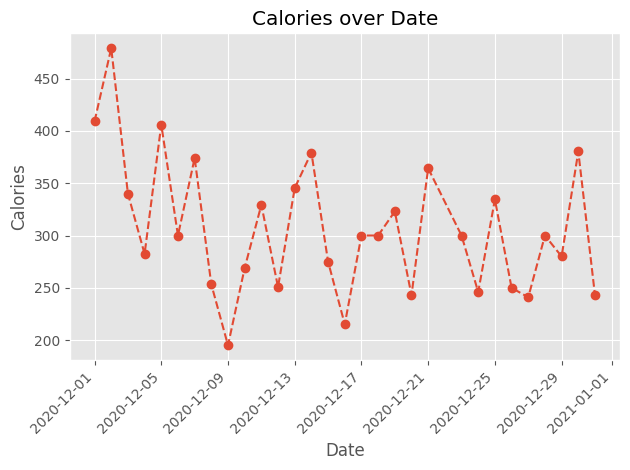

In [ ]:
# line chart
plt.plot(df["Date"], df["Calories"], linestyle='--', marker='o')
plt.title("Calories over Date")
plt.xlabel("Date")
plt.ylabel("Calories")
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

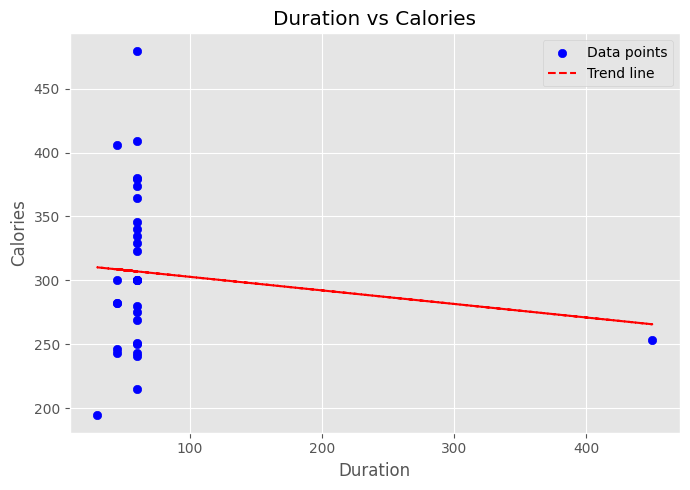

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["Duration"], df["Calories"], color='blue', label='Data points')


m, b = np.polyfit(df["Duration"], df["Calories"], 1)
plt.plot(df["Duration"], m*df["Duration"] + b, color='red', linestyle='--', label='Trend line')

plt.title(f"Duration vs Calories")
plt.xlabel("Duration")
plt.ylabel("Calories")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("scatter_duration_vs_calories.png")
plt.show()


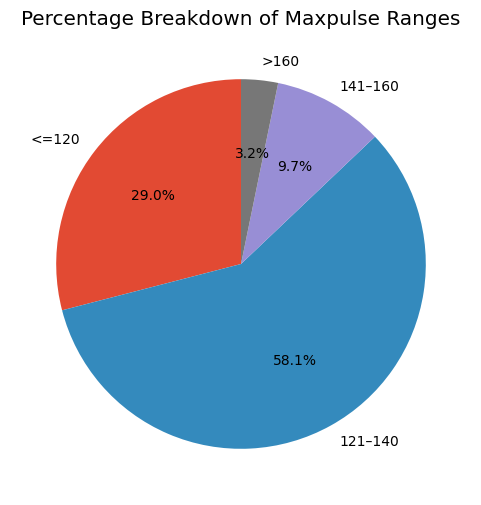

In [ ]:
# pie chart
bins = [0, 120, 140, 160, np.inf]
labels = ["<=120", "121–140", "141–160", ">160"]
df["MaxpulseRange"] = pd.cut(df["Maxpulse"], bins=bins, labels=labels)

range_counts = df["MaxpulseRange"].value_counts().sort_index()

plt.figure(figsize=(6,6))
plt.pie(range_counts, labels=range_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Percentage Breakdown of Maxpulse Ranges")
plt.savefig("pie_maxpulse_ranges.png")
plt.show()


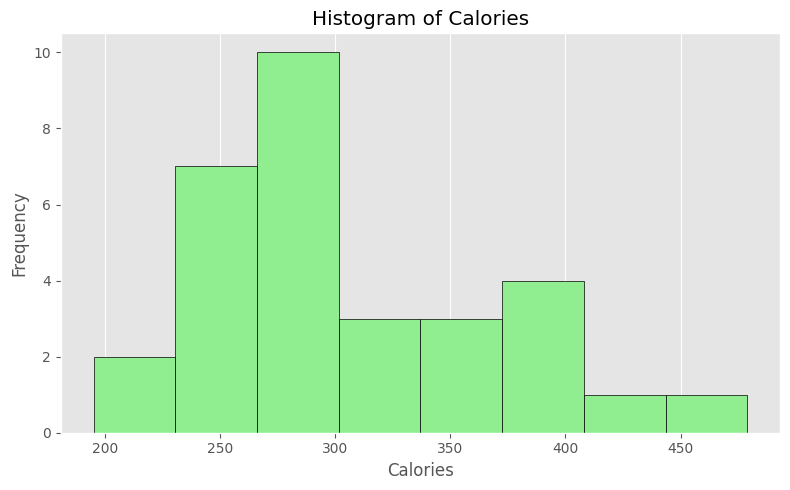

The Calories distribution is right-skewed (positive skew = 0.67).


In [ ]:
# histogram
plt.figure(figsize=(8,5))
plt.hist(df["Calories"], bins=8, color='lightgreen', edgecolor='black')
plt.title("Histogram of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("hist_calories.png")
plt.show()

# Skewness interpretation
skewness = df["Calories"].skew()
if skewness > 0:
    print(f"The Calories distribution is right-skewed (positive skew = {skewness:.2f}).")
elif skewness < 0:
    print(f"The Calories distribution is left-skewed (negative skew = {skewness:.2f}).")
else:
    print("The Calories distribution is approximately symmetric.")


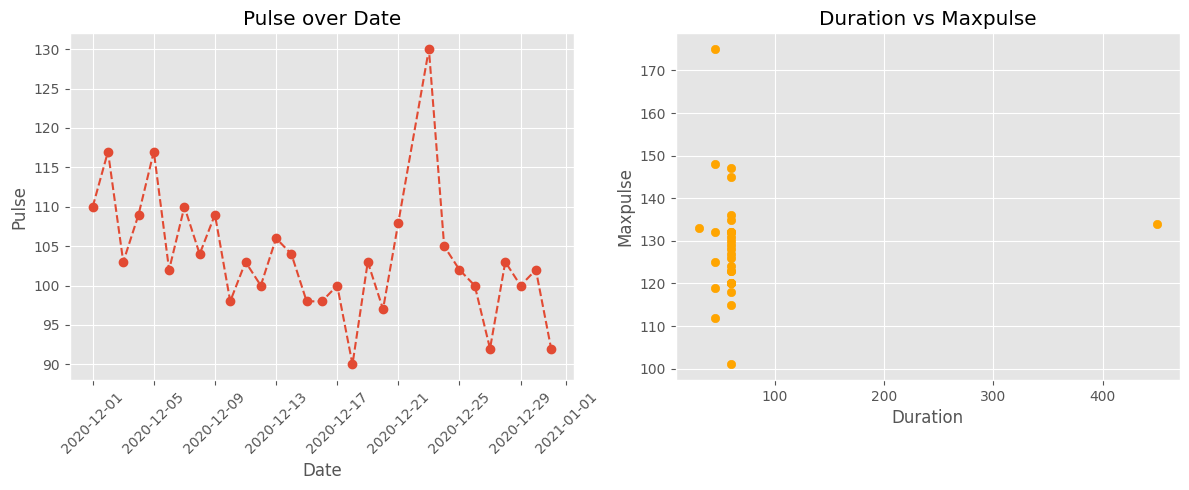

In [ ]:
plt.figure(figsize=(12,5))


plt.subplot(1, 2, 1)
plt.plot(df["Date"], df["Pulse"], linestyle='--', marker='o')
plt.title("Pulse over Date")
plt.xlabel("Date")
plt.ylabel("Pulse")
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(df["Duration"], df["Maxpulse"], color='orange')
plt.title("Duration vs Maxpulse")
plt.xlabel("Duration")
plt.ylabel("Maxpulse")
plt.grid(True)

plt.tight_layout()
plt.savefig("subplots_pulse_duration_maxpulse.png")
plt.show()
